In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

colors = sns.color_palette("rocket")
colors

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

In [69]:
df = pd.read_csv('/Users/nazarlenisin/Desktop/Regression/summer_movies.csv')
df.head(3)

,tconst,title_type,primary_title,original_title,year,runtime_minutes,genres,simple_title,average_rating,num_votes
0,tt0011462,movie,Midsummer Madness,Midsummer Madness,1920.0,60.0,Drama,midsummer madness,7.4,19
1,tt0026714,movie,A Midsummer Night's Dream,A Midsummer Night's Dream,1935.0,133.0,"Comedy,Fantasy,Romance",a midsummer nights dream,6.8,3931
2,tt0033864,movie,The Teachers on Summer Vacation,Magistrarna på sommarlov,1941.0,86.0,Comedy,the teachers on summer vacation,5.5,78


In [70]:
class Prior_Data_Analys:
  def __init__(self,df):
    self.df = df


  def shape(self):
    n_samples,n_columns = self.df.shape
    print(f'Number of samples in Data Set: {n_samples}')
    print(f'Number of columns: {n_columns}')

    return n_samples,n_columns


  def unique_columns(self):
    columns = self.df.columns
    print(f'Unique columns:\n')

    for column_idx,column in enumerate(columns):
      print(f'Column {column_idx + 1}: {column}')

    return columns


  def columns_dtypes(self):
    dtypes = self.df.dtypes
    print(f'Dtypes:\n\n {dtypes}')

    return dtypes


  def categorical_features(self):
    print(f'Categorical features:\n')
    categorical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] == 'object']

    for feature in categorical_feats:
      print(f'* {feature}')

    return np.array(categorical_feats)


  def numerical_features(self):
    print(f'Numerical features: \n')

    numerical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] != 'object']
    for feature in numerical_feats:
      print(f'* {feature}')

    return np.array(numerical_feats)


  def group_by(self,feature):
    categorical = self.categorical_features()

    if feature in categorical:
      return df.groupby([feature]).count()

    else:
      return df.groupby([feature]).describe()


  def count_NA(self):
    print(f'Amout of Nans per class:')
    return self.df.isna().sum()


  def duplicates(self):
    print(f'Amount of duplicates: {self.df.duplicated().sum()}')

  def item(self,index):
    print(f'Object number: {index}')

    return self.df.iloc[index]

  def unique_values(self,feature):
    data = self.df[feature]

    values = data.values
    unique_values = np.unique(values)
    print(f'Unique values of {feature}: {unique_values}')

    return unique_values

In [72]:
class Distribution:
  def __init__(self,df,target_feature):
    self.df = df
    self.target_feature = target_feature
    self._eda = Prior_Data_Analys(self.df)


  def distribution_of_target_feature(self):
    fig = plt.figure(figsize = (10,10))
    for visualization in range(2):
      if visualization == 0:
        fig.add_subplot(2,1,visualization + 1)
        sns.histplot(data = self.df,x = self.target_feature,color = colors[0])
        plt.title(f'Distribution of Target feature: {self.target_feature}')
        plt.show()
        
      else:
        fig.add_subplot(2,1,visualization + 1)
        sns.boxplot(x = self.df[self.target_feature],color = colors[0])
        plt.title(f'Distribution of Target feature: {self.target_feature}')
        plt.show()


  def distribution_of_numerical_features(self):
    numerical_features = self._eda.numerical_features()
    fig = plt.figure(figsize = (15,15))

    for feature_idx,feature in enumerate(numerical_features):
      if feature == 'num_votes':
        fig.add_subplot(len(numerical_features) // 2 + 1 , 2 , feature_idx + 1)
        sns.histplot(data = self.df,x = feature,color = colors[1],log_scale = True)
        plt.title(f'Distibution of {feature}')
        plt.tight_layout
        plt.show()

      else:
        fig.add_subplot(len(numerical_features) // 2 + 1 , 2 , feature_idx + 1)
        sns.histplot(data = self.df,x = feature,color = colors[1])
        plt.title(f'Distibution of {feature}')
        plt.tight_layout
        plt.show()


  def distribution_of_categorical_features(self,top_k = 5):
    categorical_features = self._eda.categorical_features()
    plt.figure(figsize = (20,20))

    for feature_idx,feature in enumerate(categorical_features):

      values = self._eda.group_by(feature)['average_rating'].sort_values(ascending = False).values[:top_k]
      labels = self._eda.group_by(feature)['average_rating'].sort_values(ascending = False).index[:top_k]

      data_dict = {'Labels': labels, 'Values': values}
      data = pd.DataFrame(data_dict)

      plt.subplot(len(categorical_features) // 2 + 1 , 2 , feature_idx + 1)
      sns.barplot(data = data,y = 'Labels',x = 'Values',color = colors[-1])
      plt.title(f'Top {top_k} {feature} by count')

    plt.tight_layout()
    plt.show()

  def relation_numerical_feats_to_target_feat(self):
    numerical_features = self._eda.numerical_features()

    data = df[numerical_features]
    corr = data.corr()

    return sns.heatmap(corr,annot = True, cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))

  def relation_categorical_feats_to_target_feat(self,top_k = 3):
    categorical_features = self._eda.categorical_features()
    plt.figure(figsize = (20,20))

    for feature_idx,feature in enumerate(categorical_features):

      feats = self._eda.group_by(feature)[self.target_feature].sort_values(ascending = False)[:top_k].index

      data = self.df
      data = data[data[feature].isin(feats)]

      plt.subplot(len(categorical_features) // 2 + 1 , 2 , feature_idx + 1)
      sns.stripplot(data = data, x = feature, y = self.target_feature,hue = feature)
      plt.title(f'Relation between {feature} & {self.target_feature}')

    plt.tight_layout()
    plt.show()  

In [73]:
class Data_Preprocessing:
  def __init__(self,df,target_feature = None):
    self.df = df
    self.target_feature = target_feature

  def _feature_target_split(self):
    if self.target_feature != None:
      X = self.df[[feature for feature in self.df.columns if feature != self.target_feature]]
      y = self.df[self.target_feature]
      return X,y

    else:
      X = self.df
      return X

  def _one_hot(self,X):
    ohe = OneHotEncoder(handle_unknown = 'ignore',sparse_output = False).set_output(transform = 'pandas')
    
    return ohe.fit_transform(X)

    return X

  def _normalize(self,X):
    X = normalize(X)
    return X
    

  def transform(self):
    if self.target_feature != None:
      numerical_features = eda.numerical_features()
      numerical_features = list(numerical_features)
      numerical_features.remove(self.target_feature)
      numerical_features = np.array(numerical_features)

      categorical_features = eda.categorical_features()

      X,y = self._feature_target_split()
      X,y = X.fillna(value = 0),y.fillna(value = 'Nan')

      X_num = self._normalize(X[numerical_features].astype(np.float64))
      X_cat = self._one_hot(X[categorical_features].astype('str'))

      X_num = pd.DataFrame(X_num,columns = numerical_features)
      X_cat = pd.DataFrame(X_cat)

      X = pd.concat([X_num,X_cat],axis = 1)

      return X,y

    else:
      numerical_features = [column for column in self.df.columns if self.df[column].dtype != 'O']
      categorical_features = eda.categorical_features()

      X = self._feature_target_split()
      X = X.fillna(value = 0)

      X_num = self._normalize(X[numerical_features].astype(np.float64))
      X_cat = self._one_hot(X[categorical_features].astype('str'))

      X_num = pd.DataFrame(X_num,columns = numerical_features)
      X_cat = pd.DataFrame(X_cat)

      X = pd.concat([X_num,X_cat],axis = 1)

      return X

In [74]:
class Train_model:
  def __init__(self,model,metric,X_train,y_train,X_test = None,y_test = None,params = None,grid_search = None):
    self.model = model
    self.metric = metric

    self.X_train = X_train
    self.y_train = y_train

    self.X_test = X_test
    self.y_test = y_test

    self.params = params

    self.grid_search = grid_search

  def fit(self):
    if self.grid_search == None:
      print(f'Model: {self.model}')
      print(f'X for train n_samples: {self.X_train.shape[0]}')
      print(f'X for train n_features: {self.X_train.shape[1]}\n')

      self._fit_model = self.model.fit(self.X_train,self.y_train)
      y_pred = self._fit_model.predict(self.X_train)

      metric_score = self.metric(self.y_train,y_pred)
      print(f'{self.metric} on Train Data: {metric_score}')

      return self._fit_model


    else:
      print(f'Model: {self.model}')
      print(f'X for train n_samples: {self.X_train.shape[0]}')
      print(f'X for train n_features: {self.X_train.shape[1]}\n')
      
      grid_search = self.grid_search(self.model,self.params)
      
      self._fit_model = grid_search.fit(self.X_train,self.y_train)
      y_pred = self._fit_model.predict(self.X_train)

      metric_score = self.metric(self.y_train,y_pred)
      print(f'{self.metric} on Train Data: {metric_score}')

      return self._fit_model

  def eval(self):
    y_pred = self._fit_model.predict(self.X_test)
    metric_score = self.metric(self.y_test,y_pred)

    print(f'{self.metric} on Test Data: {metric_score}\n\n')

    return metric_score

In [75]:
class Optimal_model:
  def __init__(self,models,metric,X_train,y_train,X_test,y_test,params = None):
    self.models = models
    self.metric = metric

    self.X_train = X_train
    self.y_train = y_train

    self.X_test = X_test
    self.y_test = y_test

    self.params = params

    self.test_metric_scores = []

  def fit(self):
    for model in self.models:
      print(f'\nModel: {model}')
      Trainer = Train_model(model,self.metric,self.X_train,self.y_train,self.X_test,self.y_test,self.params)
      print(f'Trainer: {Trainer}')

      Trainer.fit()
      metric_score = Trainer.eval()

      self.test_metric_scores.append(metric_score)

    return self.test_metric_scores
  
  def optimal(self):
    optimal_model_idx = np.argmin(self.test_metric_scores)
    model =  self.models[optimal_model_idx]
    print(f'\nOptimal model with best {self.metric} score ({self.test_metric_scores[optimal_model_idx]}): {model}\n')

    return model

In [76]:
def Predict(X,optimal_model):
  data_preprocessing = Data_Preprocessing(X)
  X_transformed = data_preprocessing.transform()
  
  prediction = optimal_model.predict(X_transformed)

  return np.array(prediction)

In [77]:
eda = Prior_Data_Analys(df)
data_visualization = Distribution(df,'average_rating')

In [78]:
eda.shape()

Number of samples in Data Set: 905
Number of columns: 10


(905, 10)

In [79]:
eda.unique_columns()

Unique columns:

Column 1: tconst
Column 2: title_type
Column 3: primary_title
Column 4: original_title
Column 5: year
Column 6: runtime_minutes
Column 7: genres
Column 8: simple_title
Column 9: average_rating
Column 10: num_votes


Index(['tconst', 'title_type', 'primary_title', 'original_title', 'year',
       'runtime_minutes', 'genres', 'simple_title', 'average_rating',
       'num_votes'],
      dtype='object')

In [80]:
eda.columns_dtypes()

Dtypes:

 tconst              object
title_type          object
primary_title       object
original_title      object
year               float64
runtime_minutes    float64
genres              object
simple_title        object
average_rating     float64
num_votes            int64
dtype: object


tconst              object
title_type          object
primary_title       object
original_title      object
year               float64
runtime_minutes    float64
genres              object
simple_title        object
average_rating     float64
num_votes            int64
dtype: object

In [81]:
eda.categorical_features()

Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title


/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] == 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] == 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ tre

array(['tconst', 'title_type', 'primary_title', 'original_title',
       'genres', 'simple_title'], dtype='<U14')

In [82]:
eda.numerical_features()

Numerical features: 

* year
* runtime_minutes
* average_rating
* num_votes


/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] != 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] != 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:44: FutureWarning: Series.__getitem__ treatin

array(['year', 'runtime_minutes', 'average_rating', 'num_votes'],
      dtype='<U15')

In [83]:
eda.count_NA()

Amout of Nans per class:


tconst              0
title_type          0
primary_title       0
original_title      0
year                1
runtime_minutes    56
genres             18
simple_title        0
average_rating      0
num_votes           0
dtype: int64

In [84]:
eda.duplicates()

Amount of duplicates: 0


In [85]:
unique_average_rating = eda.unique_values('average_rating')

Unique values of average_rating: [2.3 2.4 2.5 2.7 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2
 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.
 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8
 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.4 9.8]


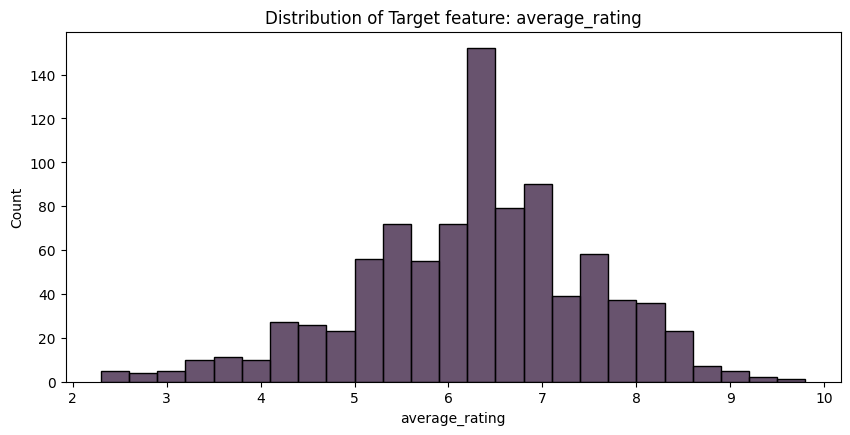

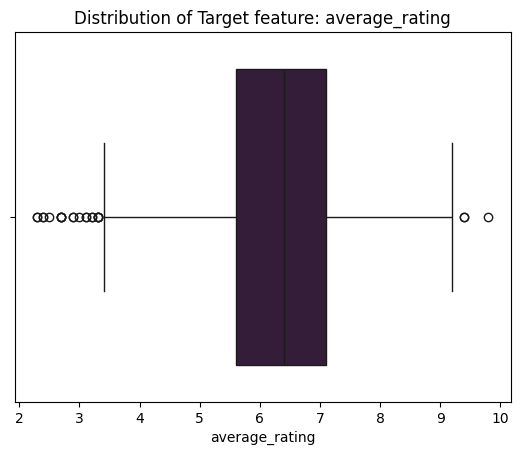

In [86]:
data_visualization.distribution_of_target_feature()

Numerical features: 

* year
* runtime_minutes
* average_rating
* num_votes


/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] != 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] != 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:44: FutureWarning: Series.__getitem__ treatin

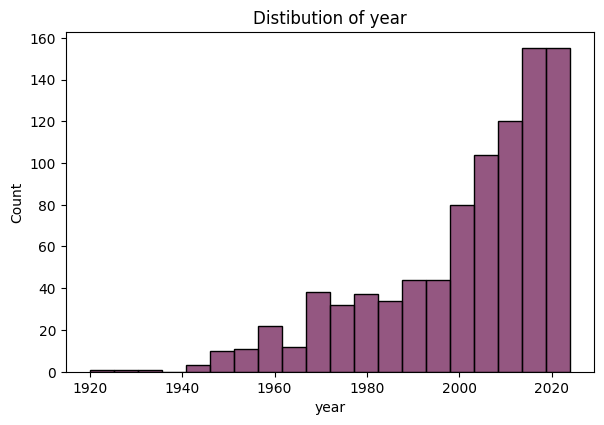

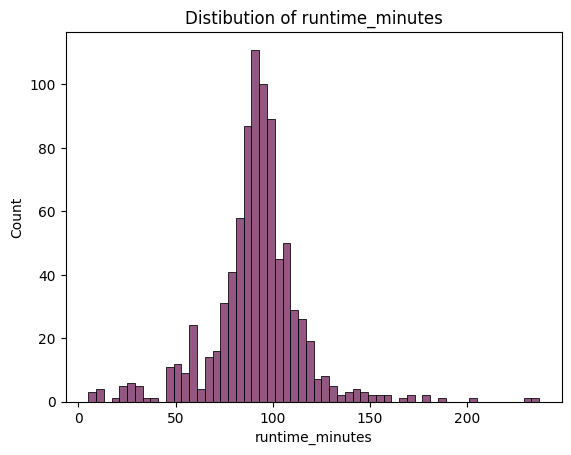

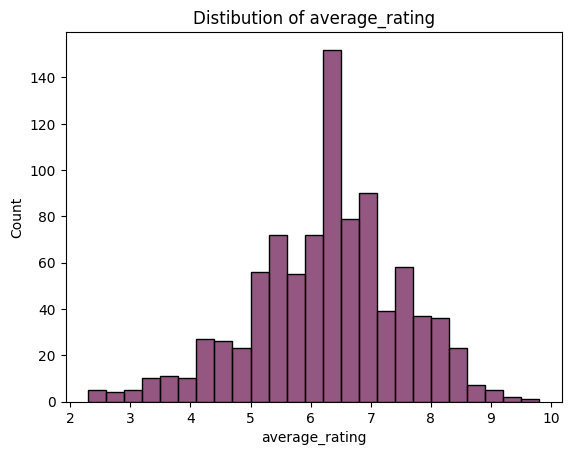

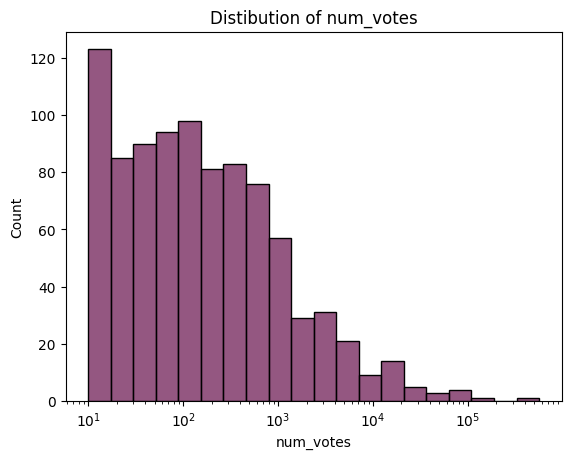

In [87]:
data_visualization.distribution_of_numerical_features()

Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* ge

/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] == 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] == 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ tre

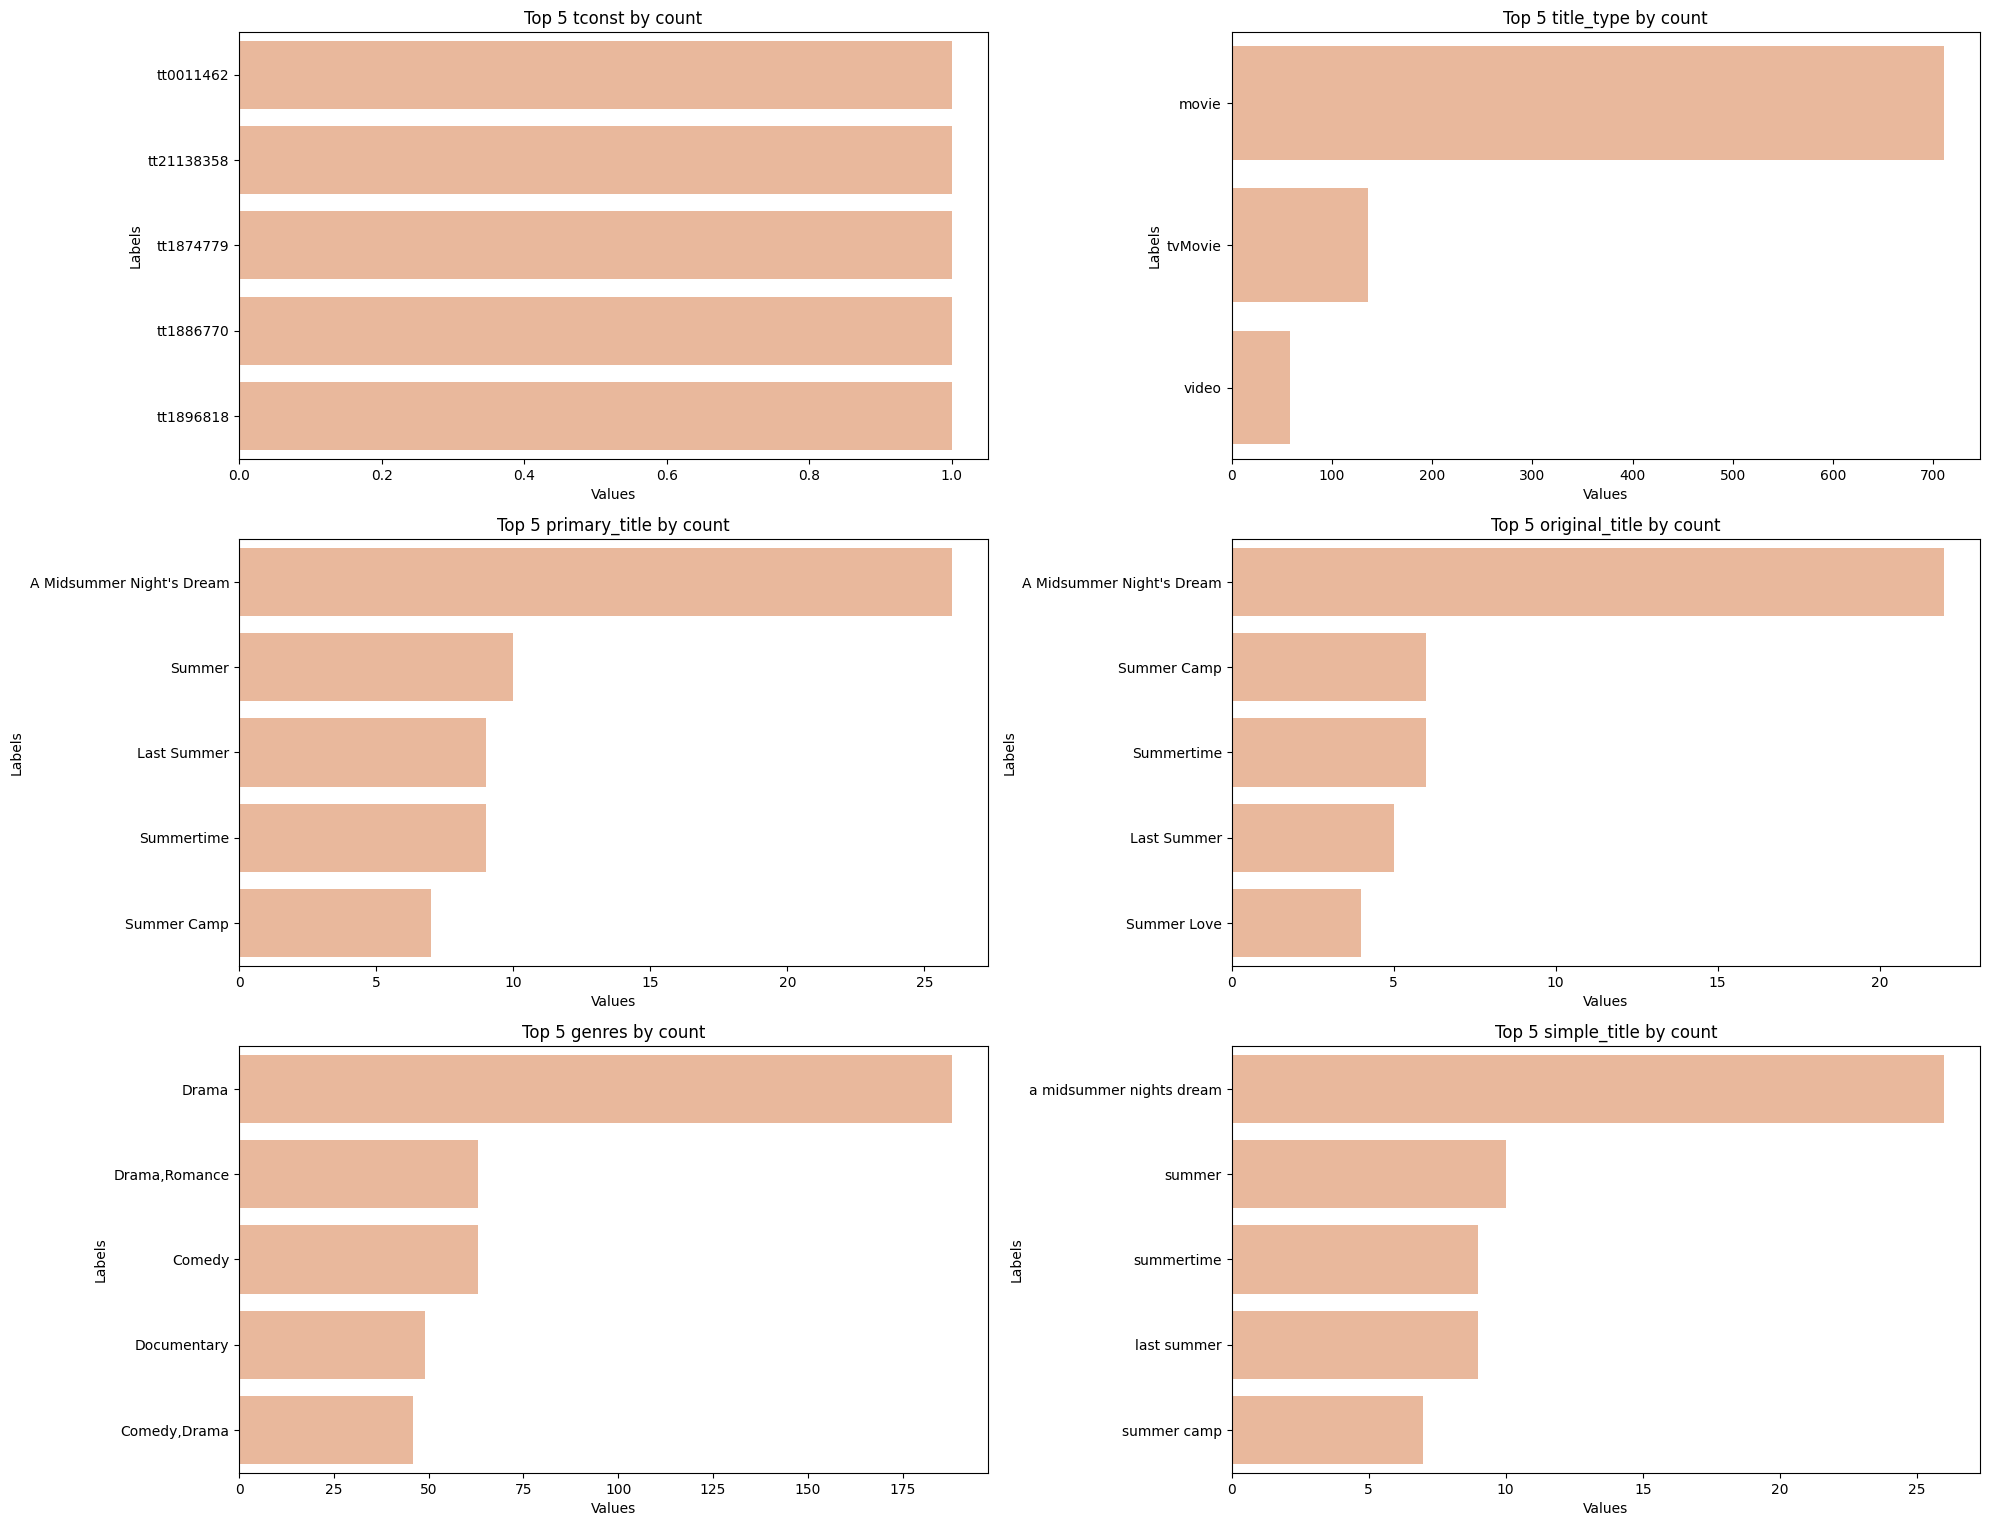

In [88]:
data_visualization.distribution_of_categorical_features()

Numerical features: 

* year
* runtime_minutes
* average_rating
* num_votes


/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] != 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] != 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:44: FutureWarning: Series.__getitem__ treatin

<Axes: >

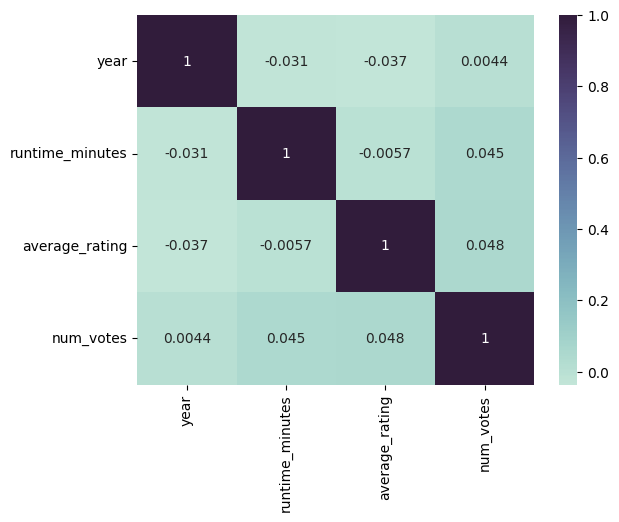

In [89]:
data_visualization.relation_numerical_feats_to_target_feat()

Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title


/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] == 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] == 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ tre

Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title


/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] == 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] == 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ tre

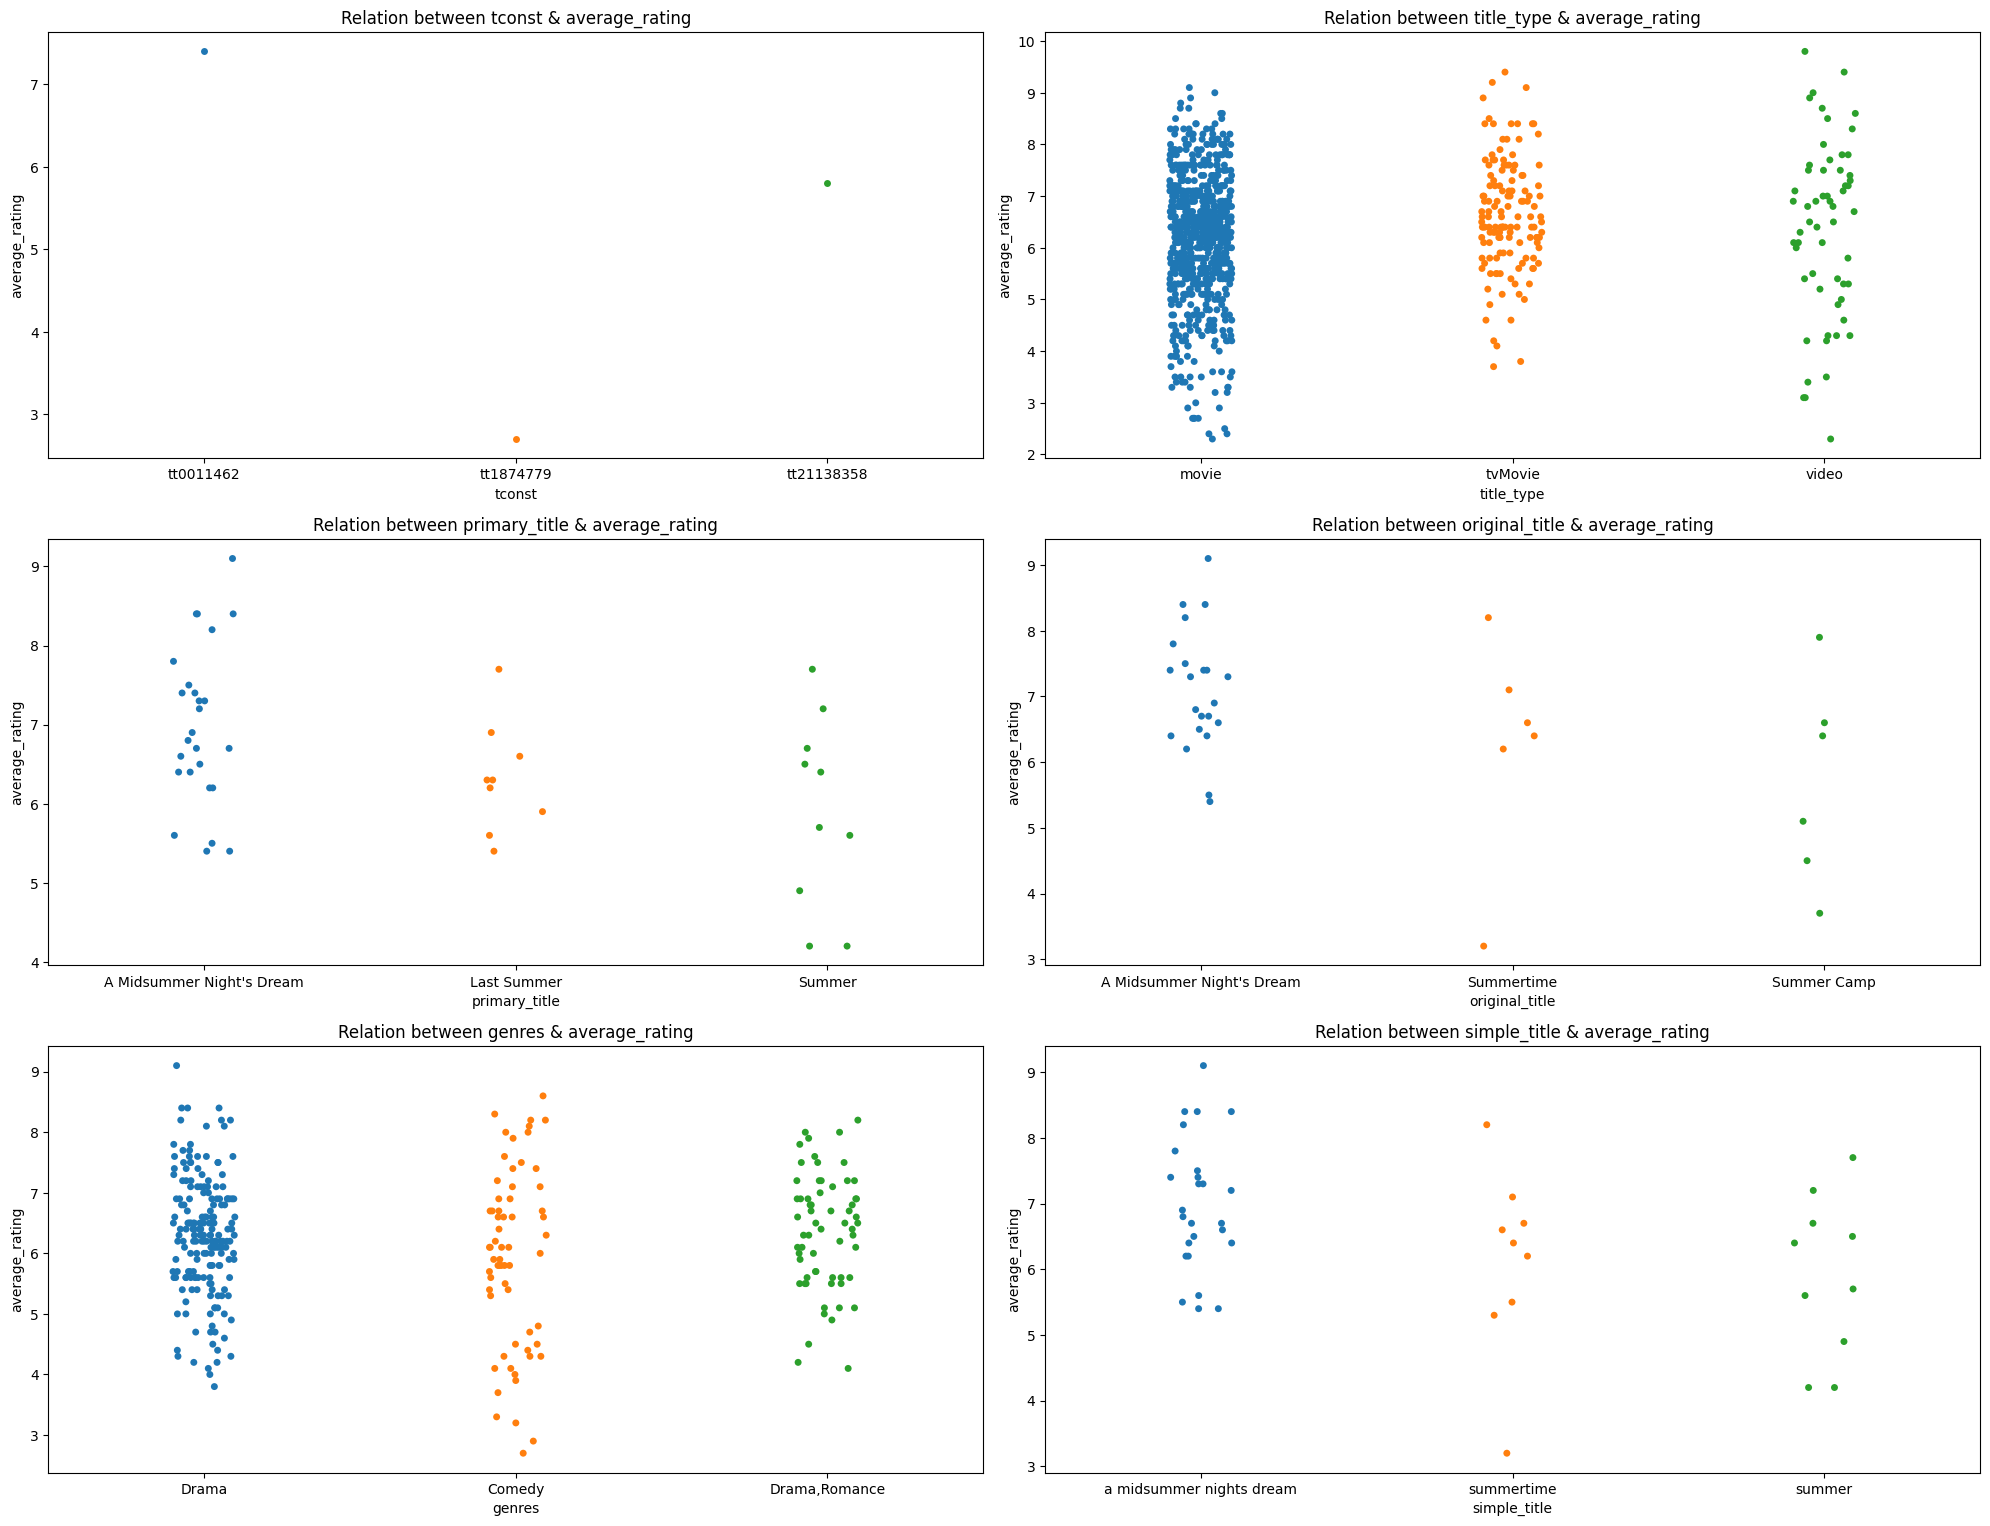

In [90]:
data_visualization.relation_categorical_feats_to_target_feat()

In [91]:
preprocessing = Data_Preprocessing(df,target_feature = 'average_rating')
X,y = preprocessing.transform()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)

Numerical features: 

* year
* runtime_minutes
* average_rating
* num_votes
Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title


/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] != 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] != 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:44: FutureWarning: Series.__getitem__ treatin

In [92]:
linear_regression = LinearRegression()
linear_regression_params = [{'lr': [0.001,0.01,1,10]}]

lasso = Lasso()
lasso_params = []

ridge = Ridge()
ridge_params = []

svr = SVR()
svr_params = []

decision_tree = DecisionTreeRegressor()
decision_tree_params = []

random_forest = RandomForestRegressor()
random_forest_params = []

xgboost = XGBRegressor()
xgboost_params = []

models = [linear_regression,lasso,ridge,svr,decision_tree,random_forest,xgboost]
params = [linear_regression_params,lasso_params,ridge_params,svr_params,decision_tree_params,random_forest_params]

In [93]:
Optimal = Optimal_model(models,mean_squared_error,X_train,y_train,X_test,y_test)

Optimal.fit()
optimal_model = Optimal.optimal()


Model: LinearRegression()
Trainer: <__main__.Train_model object at 0x131699690>
Model: LinearRegression()
X for train n_samples: 724
X for train n_features: 3467

<function mean_squared_error at 0x12c49da80> on Train Data: 3.120467881854221e-29
<function mean_squared_error at 0x12c49da80> on Test Data: 1.294275336309733



Model: Lasso()
Trainer: <__main__.Train_model object at 0x1318ad4d0>
Model: Lasso()
X for train n_samples: 724
X for train n_features: 3467

<function mean_squared_error at 0x12c49da80> on Train Data: 1.5663904299319311
<function mean_squared_error at 0x12c49da80> on Test Data: 1.4811790123927842



Model: Ridge()
Trainer: <__main__.Train_model object at 0x13169aad0>
Model: Ridge()
X for train n_samples: 724
X for train n_features: 3467

<function mean_squared_error at 0x12c49da80> on Train Data: 0.06037183815410977
<function mean_squared_error at 0x12c49da80> on Test Data: 1.2522024861113072



Model: SVR()
Trainer: <__main__.Train_model object at 0x1317ff650>
Mode

In [94]:
data = df[[column for column in df.columns if column != 'average_rating']]

prediction = Predict(data,optimal_model)
print(f'\n\nPrediction: {prediction.shape} | prediction first 5 elements: {prediction[:5]}')

Categorical features:

* tconst
* title_type
* primary_title
* original_title
* genres
* simple_title


/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] == 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorical_feats = [column for column_idx,column in enumerate(self.df.columns) if self.df.dtypes[column_idx] == 'object']
/var/folders/k9/6y59tr5d45s1nynfg_sv5zr80000gn/T/ipykernel_42786/4263177674.py:33: FutureWarning: Series.__getitem__ tre



Prediction: (905,) | prediction first 5 elements: [6.610197  6.7941685 5.650134  6.2174416 6.135028 ]
